The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [80]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [81]:
nobel = pd.read_csv('data/nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [82]:
len(nobel.sex)

1000

In [83]:
males = len(nobel[nobel['sex'] == 'Male']['sex'])
females = len(nobel[nobel['sex'] == 'Female']['sex'])

In [84]:
print(f"# males rewarded = {males} \n# females rewarded = {females}")

# males rewarded = 905 
# females rewarded = 65


In [85]:
max_gender = max(males, females)
print(f"Top gender rewarede = {max_gender} males")

Top gender rewarede = 905 males


In [86]:
if max_gender == males:
    top_gender = 'Male'
else:
    top_gender = 'Female'

In [87]:
print(f"The top gender is {top_gender}")

The top gender is Male


In [88]:
gender_count = nobel['sex'].value_counts()

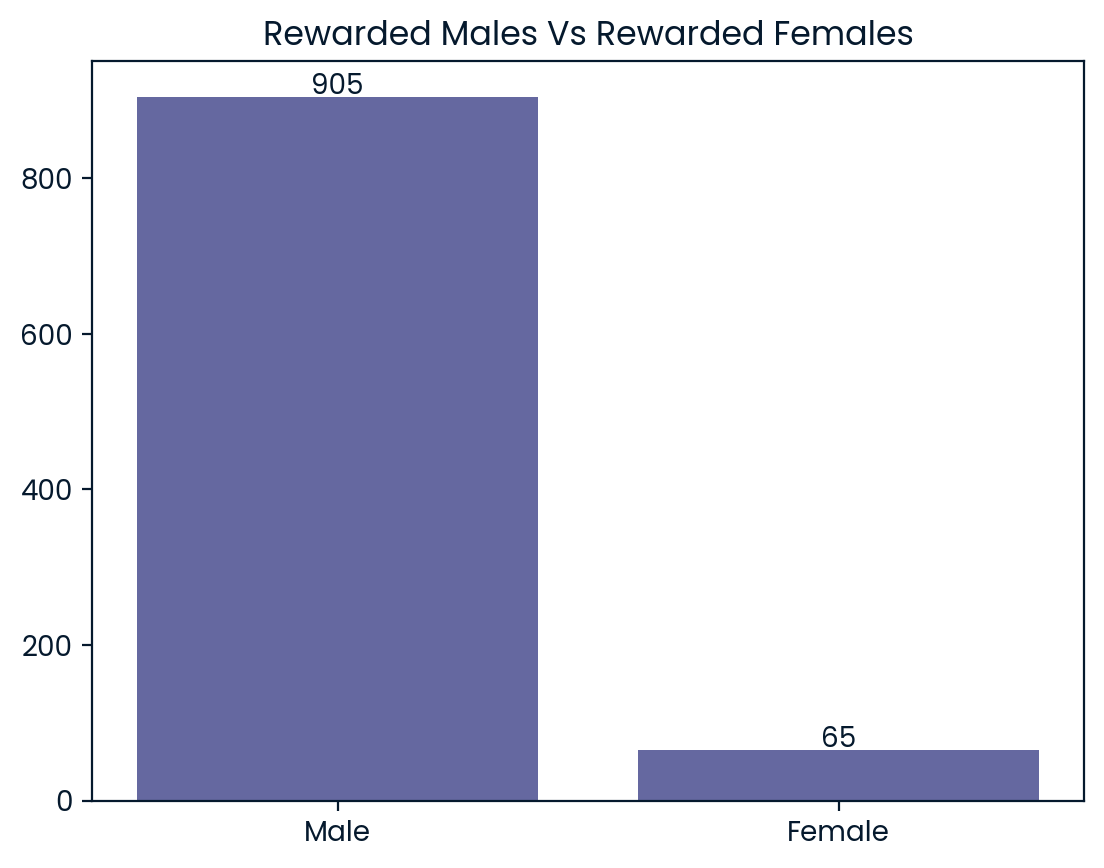

In [89]:
plt.bar(x=gender_count.index, height=gender_count.values)
for i, value in enumerate(gender_count.values):
    plt.text(x=i, y= value + 4, s=str(value), ha='center')

plt.title('Rewarded Males Vs Rewarded Females')

plt.show()

In [90]:
nobels_countries = nobel['birth_country'].value_counts()

In [91]:
nobels_countries = pd.DataFrame(nobels_countries)

In [92]:
nobels_countries.head()

,birth_country
United States of America,291
United Kingdom,91
Germany,67
France,58
Sweden,30


In [93]:
nobels_countries.columns

Index(['birth_country'], dtype='object')

In [94]:
nobels_countries.reset_index()

,index,birth_country
0,United States of America,291
1,United Kingdom,91
2,Germany,67
3,France,58
4,Sweden,30
...,...,...
124,Austria-Hungary (Ukraine),1
125,Ottoman Empire (Turkey),1
126,Russian Empire (Azerbaijan),1
127,Bosnia (Bosnia and Herzegovina),1


In [95]:
nobels_countries = nobels_countries.rename(columns={'index':'birth_country', 'birth_country' : 'count'})

In [96]:
max_count = nobels_countries['count'].max()
print(max_count)

291


In [97]:
top_country = nobel['birth_country'].value_counts().idxmax()
print(top_country)

United States of America


In [98]:
print(f"top rewarded country is {top_country} with {max_count} nobel rewards")

top rewarded country is United States of America with 291 nobel rewards


In [99]:
nobel['decade'] = (nobel['year'] // 10) * 10
nobel['decade']

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int64

In [100]:
usa_born = nobel[['birth_country', 'decade']]
usa_born = usa_born[usa_born['birth_country'] == 'United States of America']
usa_born

,birth_country,decade
35,United States of America,1900
72,United States of America,1910
79,United States of America,1910
95,United States of America,1910
117,United States of America,1920
...,...,...
987,United States of America,2020
988,United States of America,2020
990,United States of America,2020
995,United States of America,2020


In [101]:
max_decade_usa = usa_born['decade'].value_counts().idxmax()
print(max_decade_usa)

2000


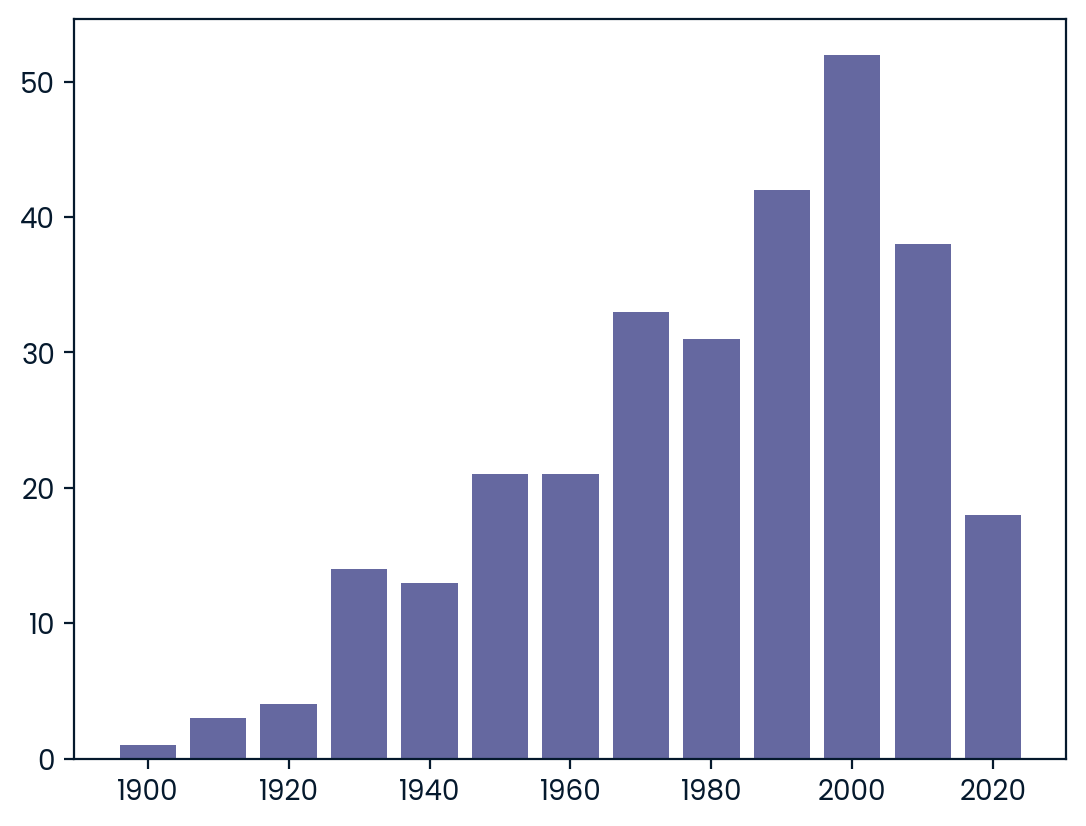

In [102]:
plt.bar(x=usa_born['decade'].value_counts().index, height=usa_born['decade'].value_counts().values, width=8)
plt.show()

In [103]:
grouped = nobel.groupby(['decade', 'category'])['sex']
total_count = grouped.count()
print(total_count)

decade  category  
1900    Chemistry      9
        Literature    10
        Medicine      11
        Peace         13
        Physics       13
                      ..
2020    Economics      9
        Literature     4
        Medicine       8
        Peace          4
        Physics       12
Name: sex, Length: 72, dtype: int64


In [104]:
female_count = grouped.apply(lambda x : (x == 'Female').sum())
female_proportion = female_count / total_count
max_combination = female_proportion.idxmax()
max_female_dict = {2020 : max_combination[1]}
women_decades = nobel[['sex', 'decade', 'full_name', 'category']][nobel[['sex', 'decade', 'full_name', 'category']]['sex'] == 'Female'].sort_values(by='decade')
women_decades

,sex,decade,full_name,category
19,Female,1900,"Marie Curie, née Sklodowska",Physics
29,Female,1900,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace
51,Female,1900,Selma Ottilia Lovisa Lagerlöf,Literature
62,Female,1910,"Marie Curie, née Sklodowska",Chemistry
128,Female,1920,Grazia Deledda,Literature
...,...,...,...,...
956,Female,2020,Emmanuelle Charpentier,Chemistry
955,Female,2020,Andrea Ghez,Physics
998,Female,2020,Narges Mohammadi,Peace
970,Female,2020,Maria Ressa,Peace


In [105]:
first_woman_name = women_decades.iloc[0]['full_name']
first_woman_name

'Marie Curie, née Sklodowska'

In [106]:
first_woman_category = women_decades.iloc[0]['category']
first_woman_category

'Physics'

In [107]:
humans_organizations = nobel[['full_name', 'organization_name']]
humans_organizations.head()

,full_name,organization_name
0,Jacobus Henricus van 't Hoff,Berlin University
1,Sully Prudhomme,NaN
2,Emil Adolf von Behring,Marburg University
3,Jean Henry Dunant,NaN
4,Frédéric Passy,NaN


In [108]:
repeat_list = humans_organizations[humans_organizations['full_name'].duplicated(keep=False)]['full_name'].unique().tolist()
repeat_list_orgs = humans_organizations[humans_organizations['organization_name'].duplicated(keep=False)]['organization_name'].unique().tolist()
repeat_list.extend(repeat_list_orgs)

In [109]:
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Frederick Sanger',
 'Berlin University',
 nan,
 'Munich University',
 'University College',
 'Leiden University',
 'Amsterdam University',
 'Stockholm University',
 'École Polytechnique',
 'Royal Institution of Great Britain',
 'Kiel University',
 'Sorbonne University',
 'University of Cambridge',
 'Institut Pasteur',
 'University of Chicago',
 'Victoria University',
 'Goettingen University',
 'Leipzig University',
 'University of Heidelberg',
 'Uppsala University',
 'Rockefeller Institute for Medical Research',
 'University of Zurich',
 'Harvard University',
 'Vienna University',
 'Edinburgh University',
 'Copenhagen University',
 'University of Oxford',
 'London University',
 'Graz University',
 'University of Toronto',
 'California Institute of Technology